# Clustering Network Traffic for Cybersecurity Analysis Using CICIDS2017 Dataset

## [LINK TO GITHUB REPOSITORY](https://github.com/Karan-D-Software/Machine-Learning-Network-Security)

This project aims to perform clustering analysis on the CICIDS2017 dataset to identify patterns and group similar types of network traffic. The objective is to detect and categorize different types of network activities, which can help in identifying normal and potentially malicious behaviors. Through this analysis, we hope to gain insights into the characteristics of various network traffic clusters and enhance our understanding of cybersecurity threats.

## Dataset
We use the CICIDS2017 dataset, which includes various types of network traffic, such as normal traffic, DoS, DDoS, and other types of attacks. The dataset is publicly available on Kaggle. [Link to the CICIDS2017 Dataset on Kaggle](https://www.kaggle.com/datasets/sweety18/cicids2017-full-dataset)

## Table of Contents
1. [Introduction](#introduction)
2. [Problem Analysis](#problem-analysis)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [About the Data and Initial Data Cleaning](#about-the-data-and-initial-data-cleaning)
    - [Data Distribution Analysis](#data-distribution-analysis)
    - [Correlations Analysis](#correlations-analysis)
    - [Outlier Analysis](#outlier-analysis)
    - [Final Data Cleaning](#final-data-cleaning)
4. [Model Training and Evaluation](#model-training-and-evaluation)
    - [Clustering Models](#clustering-models-eg-k-means-dbscan-hierarchical-clustering)
5. [Results and Discussion](#results-and-discussion)
6. [References](#references)

## Introduction
In this project, we aim to perform clustering analysis on the CICIDS2017 dataset to identify patterns and group similar types of network traffic. The CICIDS2017 dataset, provided by the Canadian Institute for Cybersecurity (CIC), includes a diverse range of network traffic data, encompassing normal and various attack activities. By leveraging unsupervised learning techniques, we seek to enhance the understanding of network behaviours and identify potential security threats, contributing valuable insights to cybersecurity.

## Problem Analysis
### What is the Problem and Its Impact on Industry?

The problem we are addressing is detecting and categorizing various types of network traffic, including potentially malicious activities, within large datasets. Cybersecurity is a critical concern for industries worldwide, as cyber-attacks can lead to significant financial losses, data breaches, and reputational damage. Traditional methods of detecting malicious activities often need help with network traffic data's vast and evolving nature. Clustering analysis offers a way to identify unusual patterns and group similar types of traffic, providing an automated method to enhance threat detection and improve network security measures.

### Machine Learning Model and Rationale
For this project, we have carefully selected two powerful clustering models: K-means clustering and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). K-means, known for its simplicity and efficiency, excels in partitioning data into distinct clusters based on similarity, a key feature for identifying patterns in large datasets. DBSCAN, on the other hand, is a champion in handling noisy data and finding arbitrarily shaped clusters, making it a potent tool for identifying outliers and unusual network behaviours. These models, when used in tandem, provide a robust framework for analyzing the CICIDS2017 dataset, instilling confidence in the effectiveness of our approach.

### Expected Outcome
The expected outcome of this project is to develop a comprehensive clustering analysis of the CICIDS2017 dataset that successfully identifies and categorizes different types of network traffic. The results should highlight distinct clusters representing normal and malicious activities, providing valuable insights into network behaviours. This analysis aims to enhance the understanding of network security threats and support the development of more effective cybersecurity measures. By uncovering hidden patterns in the data, we aim to contribute to the broader effort of improving network security in various industries.

## Exploratory Data Analysis (EDA)
The CICIDS2017 dataset contains network traffic data, including regular traffic and various attack types. It has a comprehensive set of features capturing network packets and flows. The initial steps involve loading the dataset, understanding its structure, and performing basic data cleaning, including handling missing values, converting data types, and removing irrelevant features for detailed analysis.

We have 2214468 rows of data. 

The 79 columns are as follows (`Label` is the target variable):
` Destination Port`,` Flow Duration`,` Total Fwd Packets`,` Total Backward Packets`,`Total Length of Fwd Packets`,` Total Length of Bwd Packets`,` Fwd Packet Length Max`,` Fwd Packet Length Min`,` Fwd Packet Length Mean`,` Fwd Packet Length Std`,`Bwd Packet Length Max`,` Bwd Packet Length Min`,` Bwd Packet Length Mean`,` Bwd Packet Length Std`,`Flow Bytes`,` Flow Packets`,` Flow IAT Mean`,` Flow IAT Std`,` Flow IAT Max`,` Flow IAT Min`,`Fwd IAT Total`,` Fwd IAT Mean`,` Fwd IAT Std`,` Fwd IAT Max`,` Fwd IAT Min`,`Bwd IAT Total`,` Bwd IAT Mean`,` Bwd IAT Std`,` Bwd IAT Max`,` Bwd IAT Min`,`Fwd PSH Flags`,` Bwd PSH Flags`,` Fwd URG Flags`,` Bwd URG Flags`,` Fwd Header Length`,` Bwd Header Length`,`Fwd Packets`,` Bwd Packets`,` Min Packet Length`,` Max Packet Length`,` Packet Length Mean`,` Packet Length Std`,` Packet Length Variance`,`FIN Flag Count`,` SYN Flag Count`,` RST Flag Count`,` PSH Flag Count`,` ACK Flag Count`,` URG Flag Count`,` CWE Flag Count`,` ECE Flag Count`,` Down/Up Ratio`,` Average Packet Size`,` Avg Fwd Segment Size`,` Avg Bwd Segment Size`,` Fwd Header Length.1`,`Fwd Avg Bytes/Bulk`,` Fwd Avg Packets/Bulk`,` Fwd Avg Bulk Rate`,` Bwd Avg Bytes/Bulk`,` Bwd Avg Packets/Bulk`,`Bwd Avg Bulk Rate`,`Subflow Fwd Packets`,` Subflow Fwd Bytes`,` Subflow Bwd Packets`,` Subflow Bwd Bytes`,`Init_Win_bytes_forward`,` Init_Win_bytes_backward`,` act_data_pkt_fwd`,` min_seg_size_forward`,`Active Mean`,` Active Std`,` Active Max`,` Active Min`,`Idle Mean`,` Idle Std`,` Idle Max`,` Idle Min`,` Label`

## About the Data and Initial Data Cleaning
The CICIDS2017 dataset comprises 2,214,468 entries and 79 columns, capturing a wide range of network traffic features. These features include various packet lengths, flow durations, and flag counts. The data types predominantly are `int64` and `float64`, alongside one `object` type for the labels. The initial inspection of the dataset reveals the diversity and richness of the data, which is essential for practical clustering analysis. 

Upon examining the dataset, it was observed that there were some missing values in the `Flow Bytes/s` column, with a total of 1,137 missing entries. These missing values were handled by dropping all rows with missing data, as the total number of missing data is negligible when compared to the rest of the dataset. 

Additionally, the 'Label' column, representing various network traffic types, was converted to a categorical type with specific mappings for easier processing during clustering. The dataset's distinct labels include benign and various types of attack traffic, such as DDoS, DoS GoldenEye, and Infiltration, providing a comprehensive ground for clustering analysis to detect and categorize network behaviours effectively. 

This initial data cleaning ensures that the dataset is prepared for further exploratory data analysis and clustering, maintaining its integrity and enhancing the reliability of the analysis.

In [1]:
# Here we will be reading our data from a csv file and then displaying the first 5 rows of the data
# NOTE: The data is not included in this github repo due to its size and can be found at the original source found in the README.md file

import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [2]:
# Here we can look at some of our information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214468 entries, 0 to 2214467
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [3]:
# Here we check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Flow Bytes/s    1137
dtype: int64


In [4]:
# Now we will drop the missing values
data = data.dropna()

In [5]:
# Here we will find the different categories of the data's Label column
set(data[" Label"])

{'BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'Heartbleed',
 'Infiltration',
 'PortScan'}

In [6]:
# Let's change our label to a categorical variables
label_mapping = {
    'BENIGN': 0, 
    'Bot': 1, 
    'DDoS': 2, 
    'DoS GoldenEye': 3, 
    'DoS Hulk': 4, 
    'DoS Slowhttptest': 5, 
    'DoS slowloris': 6, 
    'Heartbleed': 7, 
    'Infiltration': 8, 
    'PortScan': 9
}
data[' Label'] = data[' Label'].map(label_mapping).astype('category')

## Data Distribution Analysis
The histograms of the CICIDS2017 dataset reveal that many features are significantly right-skewed, indicating a concentration of lower values with long tails extending towards higher values. Features such as `Flow Duration`, `Total Fwd Packets`, and `Total Backward Packets` exemplify this skewness, reflecting the predominance of short-duration and low-packet flows in the network traffic data. This distribution is typical in cybersecurity datasets where benign traffic is frequent and consistent, while malicious traffic, although less common, tends to exhibit more extreme values. Such variability and the presence of outliers, especially in features like `Flow Duration` and `Max Packet Length`, underscore the importance of preprocessing steps like normalization to enhance the effectiveness of clustering algorithms in identifying patterns and anomalies in the data. 

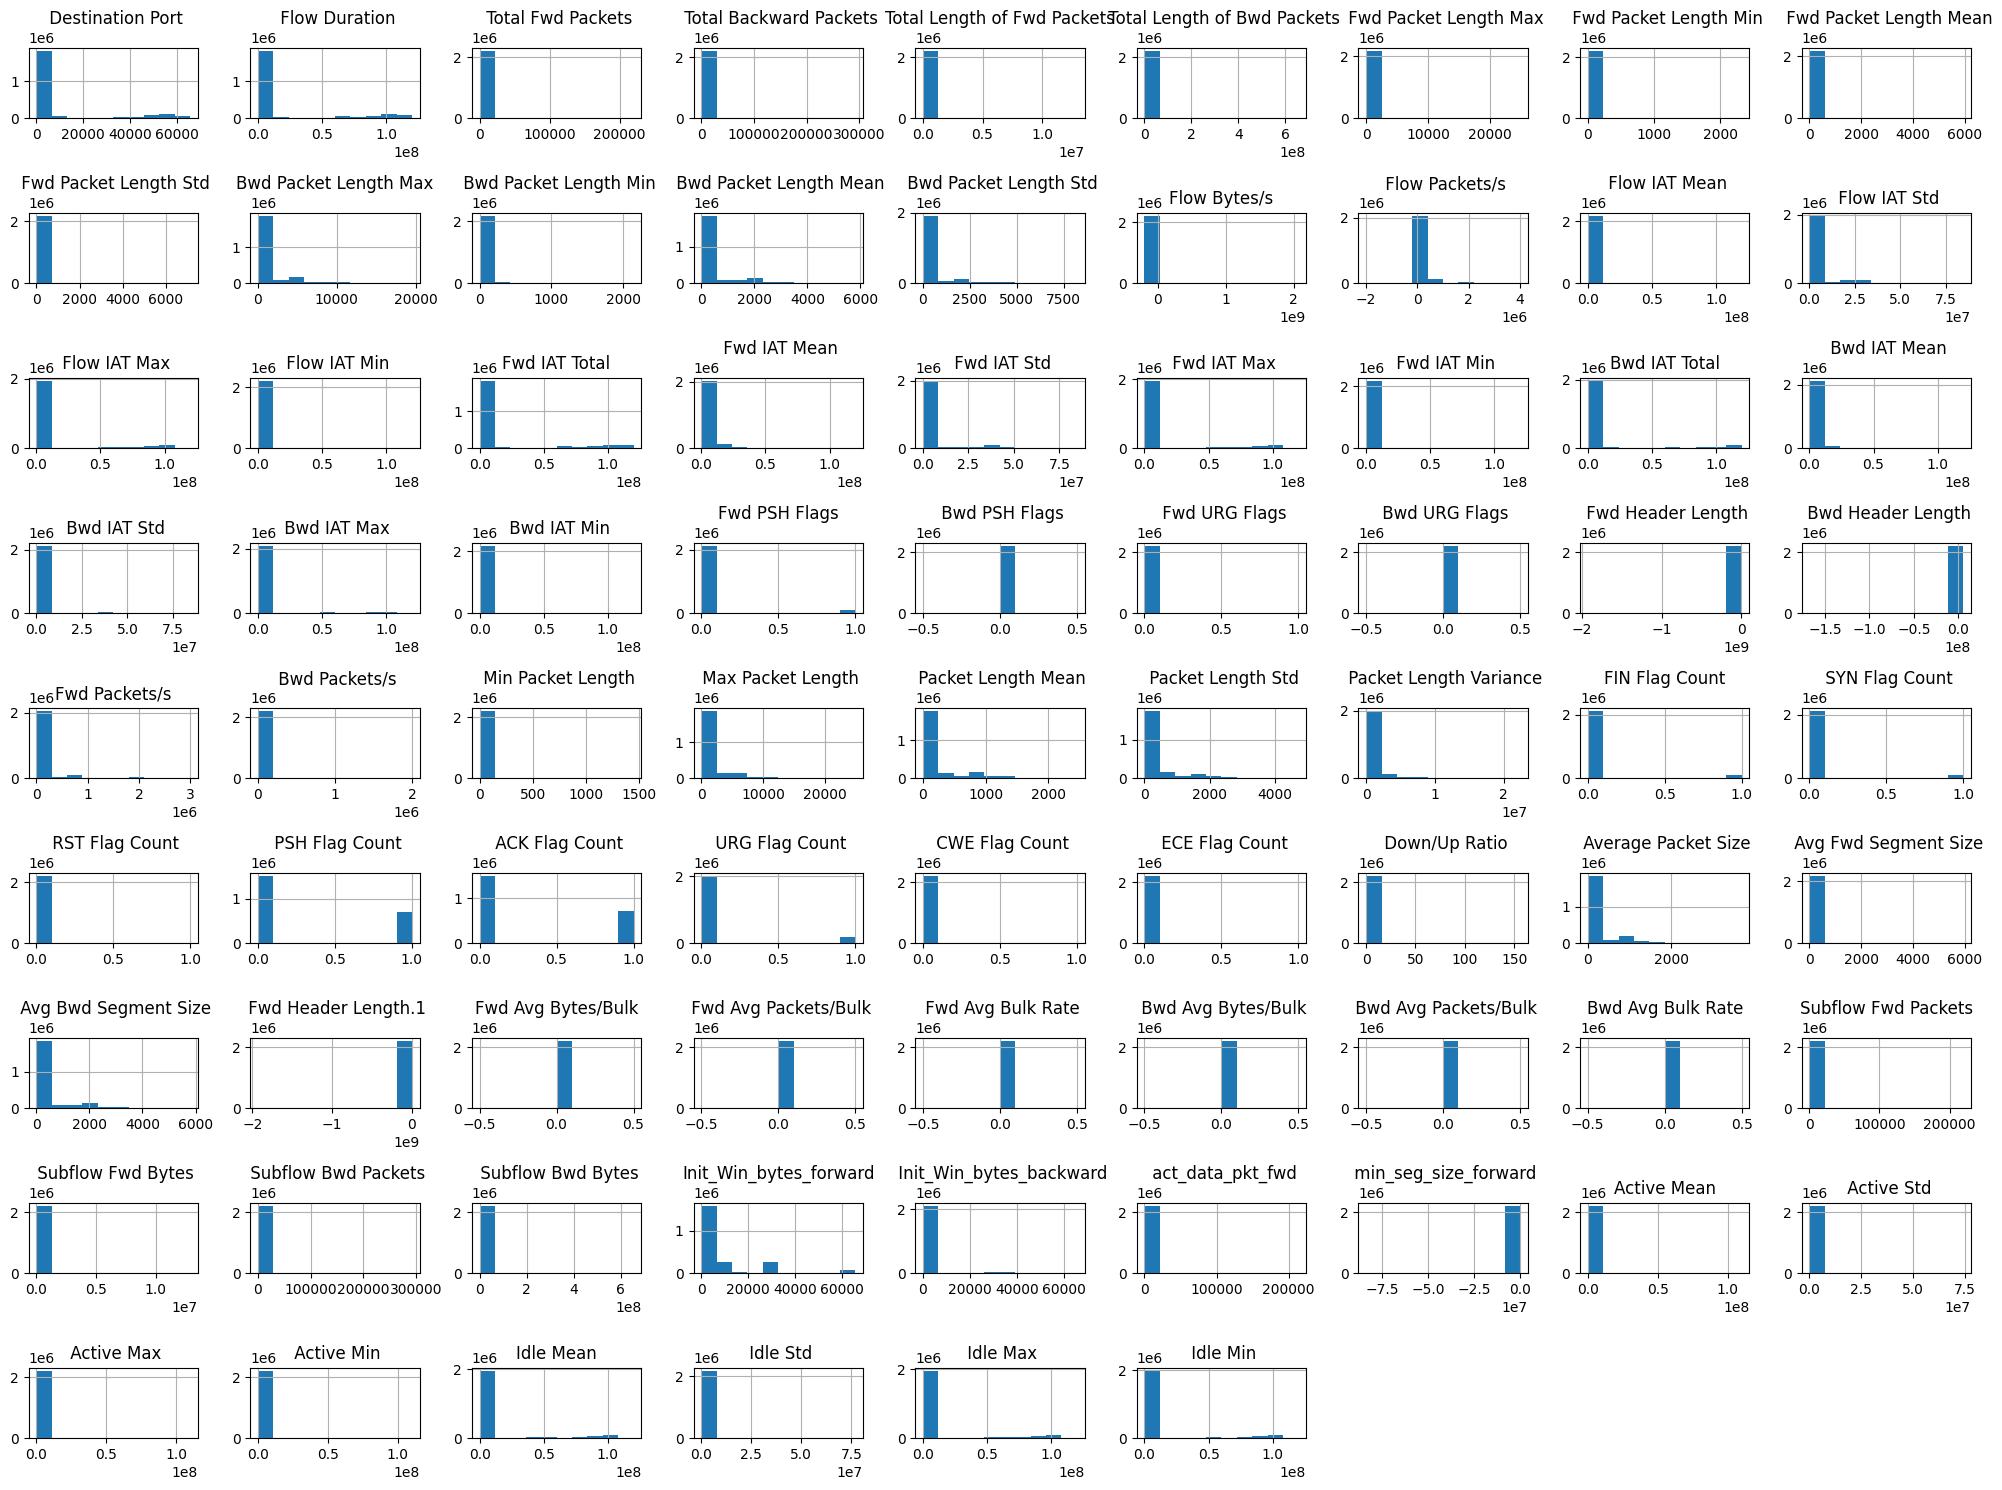

In [9]:
# Here we will plot histograms of the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna()

data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

## Correlations Analysis
The correlation matrix provides a comprehensive overview of the relationships between various features in the CICIDS2017 dataset. Strong positive correlations are observed between features related to packet lengths and counts, such as `Total Fwd Packets` and `Total Length of Fwd Packets`, indicating that higher packet counts are associated with greater total lengths. Similarly, features related to flow inter-arrival times (IAT) and packet lengths show notable correlations, suggesting consistent patterns in network traffic flow durations. Additionally, features like `Fwd Packets/s` and `Flow Packets/s` are highly correlated, reflecting the interdependence of forward and overall packet rates. These insights are crucial for understanding the data structure, guiding feature selection, and identifying potential redundancies, enhancing the effectiveness of subsequent clustering analysis by focusing on the most informative features.

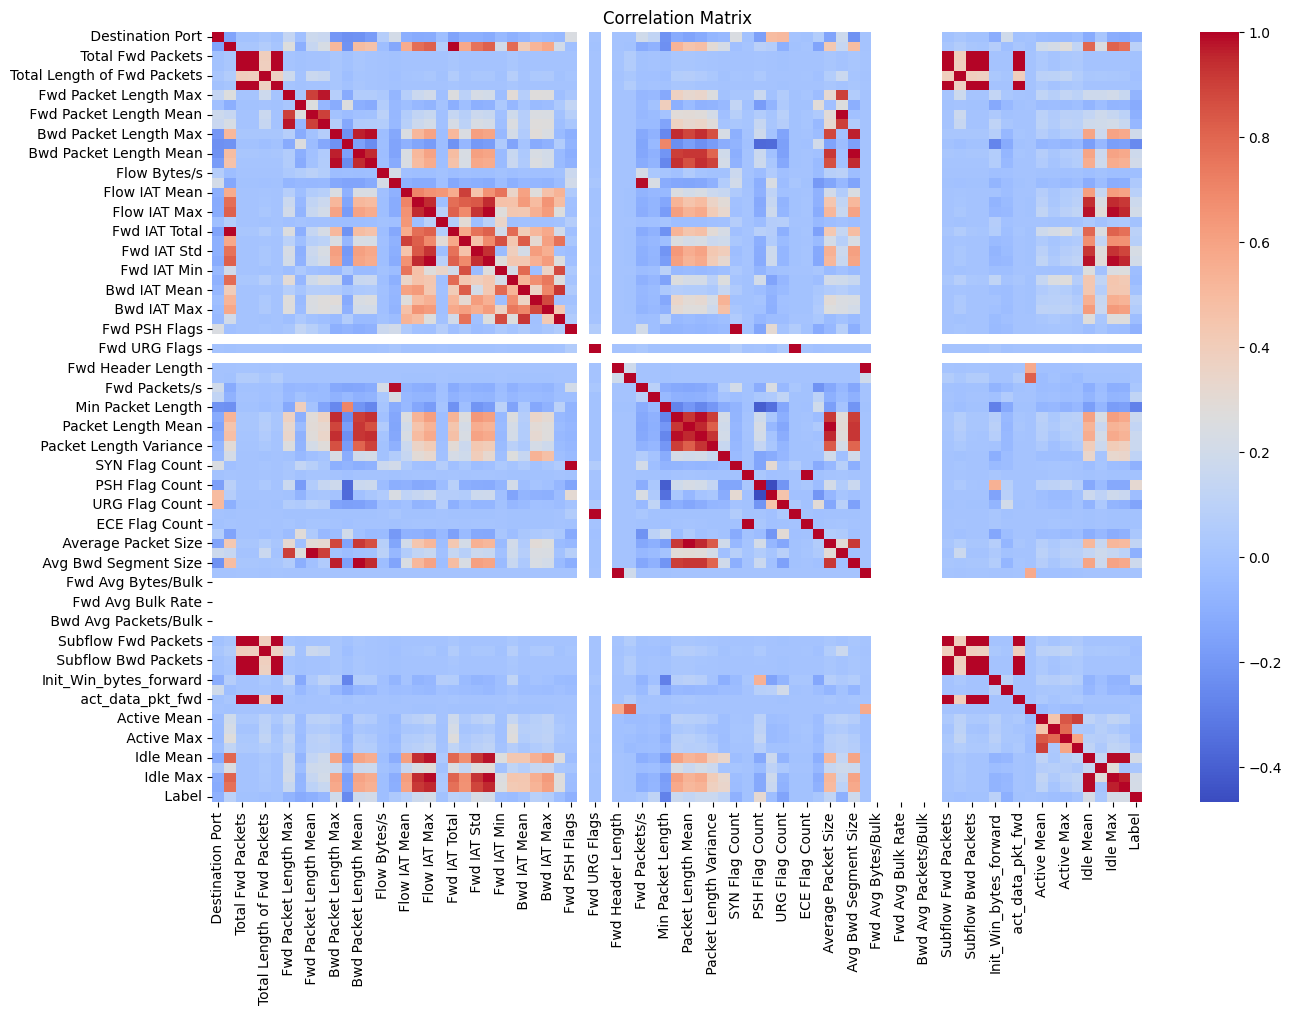

In [10]:
# Here we will plot the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Outlier Analysis
The box plots generated for each feature in the CICIDS2017 dataset provide visualization of the presence and extent of outliers across the dataset. This method of outlier analysis was chosen due to its simplicity and effectiveness in highlighting extreme values that deviate significantly from the central distribution. The plots reveal that many features contain substantial outliers, particularly in metrics related to packet lengths, flow durations, and inter-arrival times. For instance, features such as `Flow Duration`, `Total Fwd Packets`, and `Total Length of Fwd Packets` display many outliers, points outside the box plots' whiskers. These outliers often represent unusual or potentially malicious network behaviours that deviate from standard traffic patterns.

This visual approach to outlier analysis is preferred over statistical methods like Z-score analysis because it provides an intuitive and immediate understanding of the data distribution and the range of outliers. The box plots allow for a quick assessment of the spread and central tendency of each feature, as well as the identification of extreme values that may need to be addressed during preprocessing. Additionally, the box plots reveal that certain features, such as flag counts (`PSH Flag Count,` `ACK Flag Count`), have distinct distributions with numerous outliers, indicating specific network behaviours that could be associated with various types of cyber attacks. By identifying these outliers, we can better understand the variability within the dataset and make informed decisions on handling these extreme values to ensure the robustness and accuracy of the clustering analysis.

<Figure size 2000x1500 with 0 Axes>

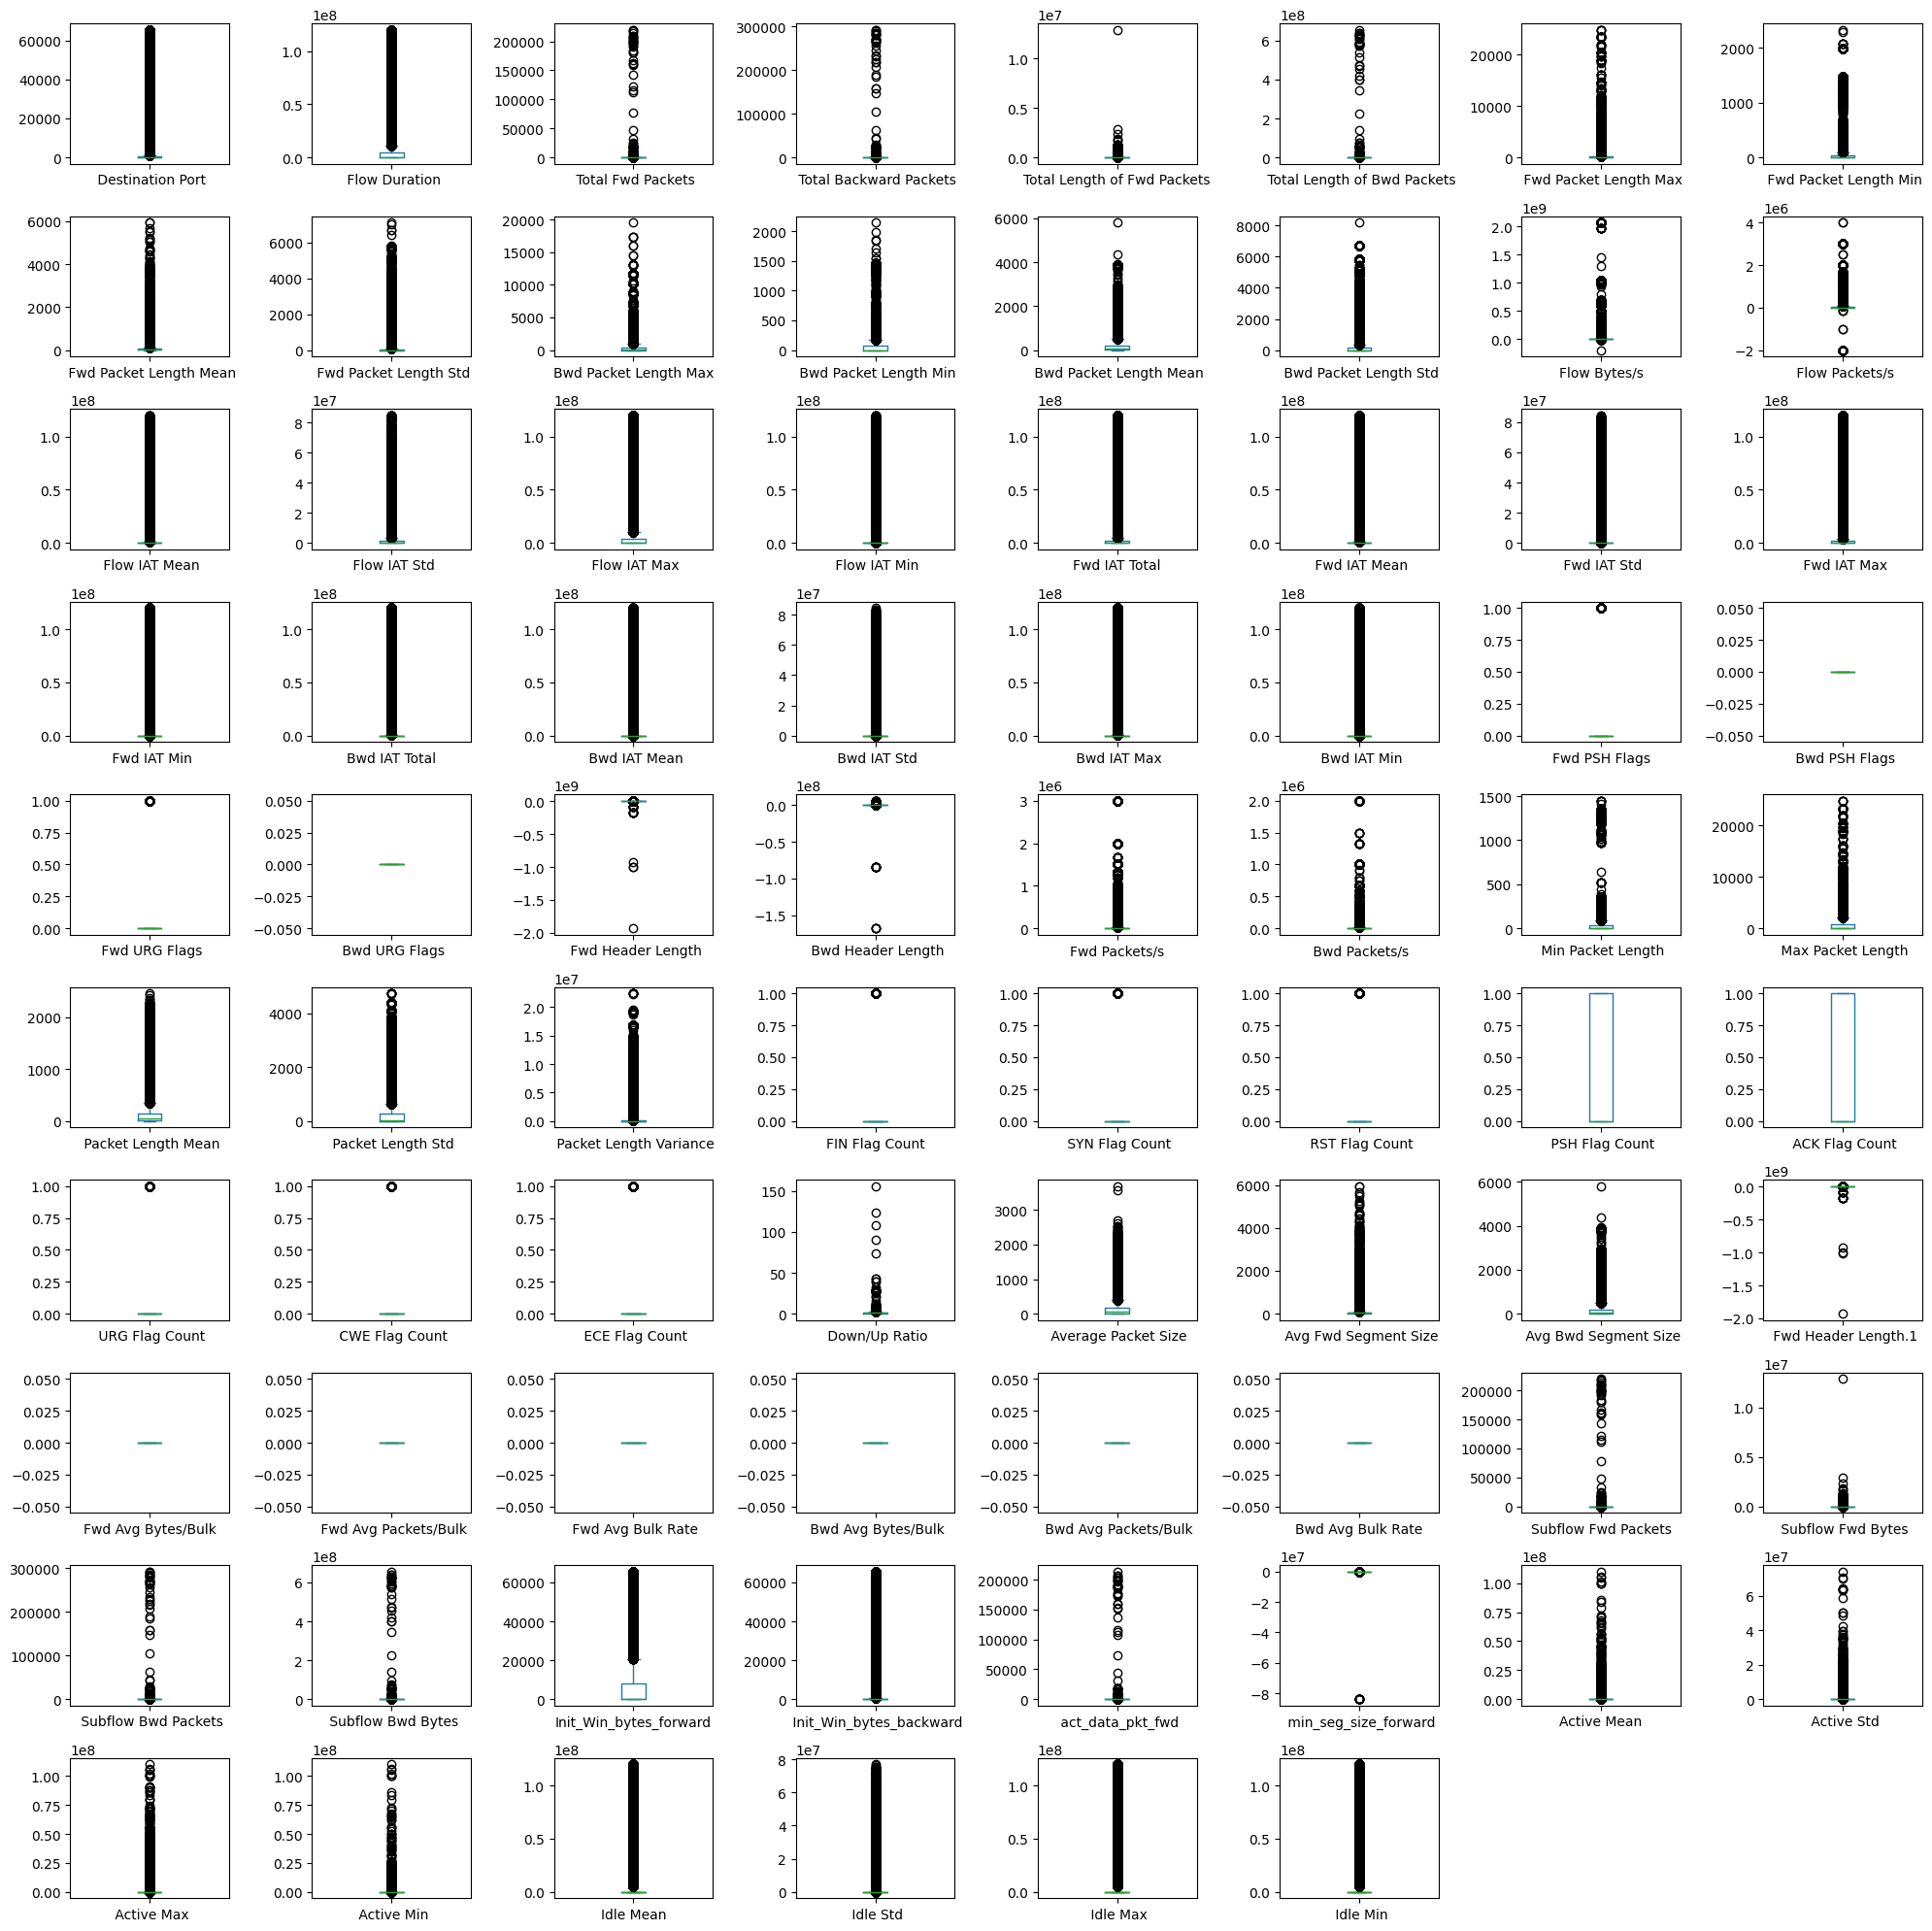

In [11]:
# Here we will plot our outliers
plt.figure(figsize=(20, 15))
data.plot(kind='box', subplots=True, layout=(10, 8), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### Final Data Cleaning and Outlier Removal

We employed an adjusted Interquartile Range (IQR) method with a higher multiplier to handle outliers and retain a substantial portion of the dataset. This approach was chosen because the IQR method is a robust statistical technique for identifying and handling extreme values. By adjusting the multiplier to 10 and setting the quartile thresholds to the 5th and 95th percentiles, we aimed to strike a balance between removing extreme outliers and retaining valuable data points. This adjustment allowed us to reduce the data from 2,214,468 entries to 1,850,452 entries, indicating that we managed to preserve a significant portion of the data while still addressing the outliers.

The results of this approach show that the dataset now consists of 79 columns with no missing values, as all NaNs were appropriately handled before the outlier removal process. By using the adjusted IQR method, we were able to filter out the most extreme values without overly compromising the dataset size. This ensures that the remaining data is both clean and representative of the underlying network traffic patterns. This comprehensive Exploratory Data Analysis (EDA) and balanced outlier handling techniques have effectively prepared our dataset for the next phase of clustering analysis. We can uncover meaningful patterns and anomalies in the network traffic data by retaining a significant portion of the data and ensuring it is well-cleaned and imputed.

In [37]:
# We will be removing outliers from the dataset using IQR method
def remove_outliers(df, multiplier):
    numeric_df = df.select_dtypes(include=[float, int])  
    Q5th = numeric_df.quantile(0.05)
    Q95th = numeric_df.quantile(0.95)
    IQR = Q95th - Q5th
    is_not_outlier = ~((numeric_df < (Q5th - multiplier * IQR)) | (numeric_df > (Q95th + multiplier * IQR))).any(axis=1)
    return df[is_not_outlier]

data_clean = remove_outliers(data, 10)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1850452 entries, 0 to 2214467
Data columns (total 79 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0    Destination Port             float64 
 1    Flow Duration                float64 
 2    Total Fwd Packets            float64 
 3    Total Backward Packets       float64 
 4   Total Length of Fwd Packets   float64 
 5    Total Length of Bwd Packets  float64 
 6    Fwd Packet Length Max        float64 
 7    Fwd Packet Length Min        float64 
 8    Fwd Packet Length Mean       float64 
 9    Fwd Packet Length Std        float64 
 10  Bwd Packet Length Max         float64 
 11   Bwd Packet Length Min        float64 
 12   Bwd Packet Length Mean       float64 
 13   Bwd Packet Length Std        float64 
 14  Flow Bytes/s                  float64 
 15   Flow Packets/s               float64 
 16   Flow IAT Mean                float64 
 17   Flow IAT Std                 float64 
 18   Flow I

## References
Canadian Institute for Cybersecurity (CIC). (2017). CICIDS 2017 dataset. Retrieved from [https://www.unb.ca/cic/datasets/ids-2017.html](https://www.unb.ca/cic/datasets/ids-2017.html)

Kaggle. (2023). CICIDS2017 full dataset. Retrieved May 27, 2024, from [https://www.kaggle.com/datasets/sweety18/cicids2017-full-dataset](https://www.kaggle.com/datasets/sweety18/cicids2017-full-dataset)

----------------------------------------------------------------------------------------------------------------------------

© Karan D 2024